In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn

In [238]:
weight = 0.7
bias = 0.3

In [239]:
start = 0
end = 1
step = 0.02

In [240]:
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

In [241]:
X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [242]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [243]:
train_split = int(len(X) * 0.8)

In [244]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [245]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
  # training
  plt.scatter(x = train_data, y = train_labels, s = 5, c = "g", label = "Training")
  # testing
  plt.scatter(x = test_data, y = test_labels, s = 5, c = "b",  label = "Testing")
  #predictions
  if predictions is not None:
    plt.scatter(x = test_data, y = predictions, label = "Predictions", s = 5, c = "r")
  plt.legend()

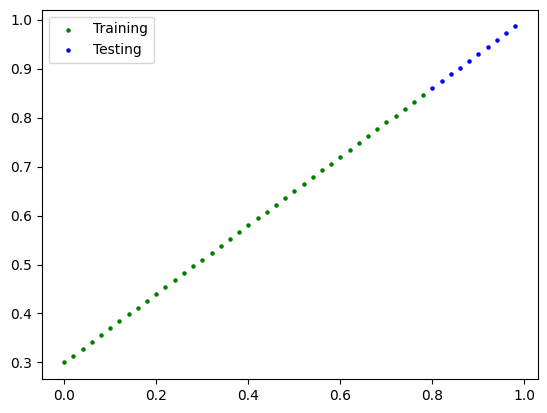

In [246]:
plot_predictions(X_train, y_train, X_test, y_test)

In [247]:
# linear regression model
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Linear(in_features = 1, out_features = 1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.layer(x)


In [248]:
# model instance
torch.manual_seed(70)
model =LinearModel()
model, model.state_dict()

(LinearModel(
   (layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('layer.weight', tensor([[-0.1300]])),
              ('layer.bias', tensor([-0.2817]))]))

In [249]:
next(model.parameters()).device

device(type='cpu')

In [250]:
# put model on GPU
model = model.to(device)

In [251]:
# create optimizer and loss function
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01)

# set manual seed
#torch.manual_seed(70)

# set epochs
epochs = 1000

# put everything on GPU
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

In [252]:
# train the model
torch.manual_seed(70)
for epoch in range (epochs):
  model.train()
  predictions = model(X_train)
  loss = loss_function(predictions, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()
  with torch.inference_mode():
    test_predictions = model(X_test)
    test_loss = loss_function(test_predictions, y_test)
  if epoch % 100 == 0:
    print(f'epoch: {epoch}   |    loss: {loss}      | test loss: {test_loss}')


epoch: 0   |    loss: 0.9053991436958313      | test loss: 1.306910753250122
epoch: 100   |    loss: 0.09480419754981995      | test loss: 0.24515075981616974
epoch: 200   |    loss: 0.058811839669942856      | test loss: 0.13654612004756927
epoch: 300   |    loss: 0.024471886456012726      | test loss: 0.056568242609500885
epoch: 400   |    loss: 0.003993944730609655      | test loss: 0.01177891530096531
epoch: 500   |    loss: 0.003993944730609655      | test loss: 0.01177891530096531
epoch: 600   |    loss: 0.003993944730609655      | test loss: 0.01177891530096531
epoch: 700   |    loss: 0.003993944730609655      | test loss: 0.01177891530096531
epoch: 800   |    loss: 0.003993944730609655      | test loss: 0.01177891530096531
epoch: 900   |    loss: 0.003993944730609655      | test loss: 0.01177891530096531


In [253]:
# importing pretty print
from pprint import pprint

# predictions for parameter values
pprint(f'predicted values: {model.state_dict()}\n')

# original values
print(f'original values: weight: {weight}  bias: {bias}')

("predicted values: OrderedDict([('layer.weight', tensor([[0.6954]], "
 "device='cuda:0')), ('layer.bias', tensor([0.3058], device='cuda:0'))])\n")
original values: weight: 0.7  bias: 0.3


In [254]:
model.eval()

LinearModel(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)

In [255]:
# evaluate the model
with torch.inference_mode():
  preds = model(X_test)
preds


tensor([[0.8621],
        [0.8760],
        [0.8899],
        [0.9038],
        [0.9177],
        [0.9316],
        [0.9456],
        [0.9595],
        [0.9734],
        [0.9873]], device='cuda:0')

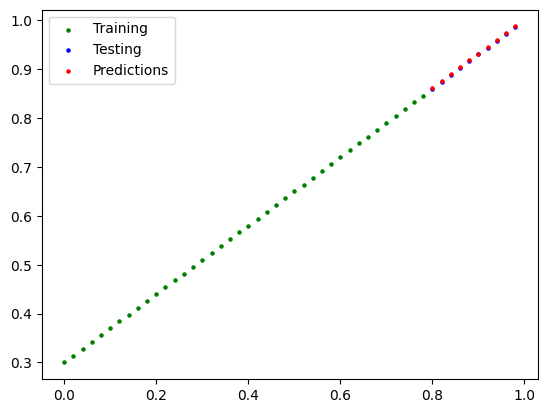

In [256]:
# show predictions

plot_predictions(predictions = preds.cpu())

In [260]:
#saving model

from pathlib import Path
import torch

# Define the directory and filename
MODEL_PATH = Path('linear')
MODEL_NAME = 'linregression.pth'

# Combine the directory and filename to create the full path
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f'Saving to {MODEL_SAVE_PATH}\n')

# Save the model's state_dict
torch.save(model.state_dict(), MODEL_SAVE_PATH)


Saving to linear/linregression.pth



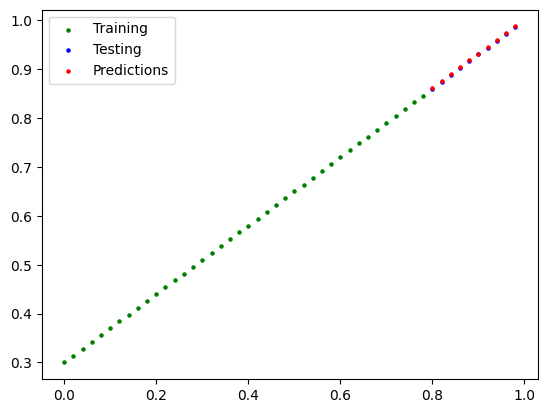

In [262]:
# laoding the saved model

loaded = LinearModel()
loaded.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded.to(device)
with torch.inference_mode():
  loaded_preds = loaded(X_test)
predictions = loaded_preds
plot_predictions(predictions = predictions.cpu())